<a href="https://colab.research.google.com/github/mbururyan/Carrefour-KE-Data-Analysis/blob/main/Carrefour_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carrefour Kenya Data Analysis

This is a notebook where unsupervised learning processes such as Dimensionality Reduction, Feature Selection, association analysis and anomaly detection will be implemented so as to help boost the sales of the company. 

# Load Required Libraries

In [ ]:
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [5]:
# View available libraries
library()

In [6]:
# Load Tsne package
install.packages("Rtsne")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [20]:
# Caret package
install.packages('caret')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’




In [44]:
#Corrplot package
install.packages('corrplot')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [88]:
# Installing the wrapper packages
install.packages('clustvarsel')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘DEoptimR’, ‘mvtnorm’, ‘pcaPP’, ‘leaps’, ‘robustbase’, ‘inline’, ‘rrcov’, ‘mclust’, ‘BMA’




In [89]:
install.packages('mclust')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [94]:
# Arules package for association analysis
install.packages('arules')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [135]:
# Anomalize package for anomaly detection
install.packages('anomalize')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘TTR’, ‘later’, ‘quadprog’, ‘quantmod’, ‘furrr’, ‘htmlwidgets’, ‘lazyeval’, ‘crosstalk’, ‘promises’, ‘warp’, ‘BH’, ‘fracdiff’, ‘lmtest’, ‘tseries’, ‘urca’, ‘RcppArmadillo’, ‘rsample’, ‘plotly’, ‘padr’, ‘xts’, ‘zoo’, ‘slider’, ‘anytime’, ‘forecast’, ‘timetk’, ‘sweep’, ‘tibbletime’




In [156]:
install.packages("tibbletime")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Loading the data

In [8]:
# Load the first data set for dimension Reduction and feature selection
df1 <- read.csv('/content/Supermarket_Dataset_1 - Sales Data.csv')
head(df1)

,Invoice.ID,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Date,Time,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,548.9715
2,226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,80.2200
3,631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,340.5255
4,123-19-1176,A,Member,Male,Health and beauty,58.22,8,23.2880,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,489.0480
5,373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,634.3785
6,699-14-3026,C,Normal,Male,Electronic accessories,85.39,7,29.8865,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1,627.6165


In [9]:
# Check for no of rows vs columns

print(nrow(df1))
print(ncol(df1))

[1] 1000
[1] 16


The dataset has 1000 rows of data with 16 features

* We will go right into Dimensionality Reduction, due to time constraints.

# Dimensionality Reduction

### Will use t-SNE to reduce the dimensions of the data to a low dimensional space. 

This is so as PCA cannot retain non-linear variance. Our data consistes of different datatypes and scales, most of which are non linear, and will hopefully be handled by t-SNE.

In [87]:
# Load the t-SNE library
library(Rtsne)

In [11]:
# Load the data
df_tsne <- df1

# Separate the label for plotting

label <- df_tsne$Branch
unique(label)


[1] "A" "C" "B"

In [16]:
# Change the label to factor datatype and assign colors

label <- as.factor(label)

print(class(label))

# Assign colors
colors <- rainbow(length(unique(label)))

names(colors) <- unique(label)

print(colors)

[1] "factor"
        A         C         B 
"#FF0000" "#00FF00" "#0000FF" 


In [57]:
# Specify features to be used and proceed in encoding

df_tsne2 <- df_tsne[, c(2:8, 11, 12, 14, 15, 16)]

head(df_tsne2)

,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Payment,cogs,gross.income,Rating,Total
,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,A,Member,Female,Health and beauty,74.69,7,26.1415,Ewallet,522.83,26.1415,9.1,548.9715
2,C,Normal,Female,Electronic accessories,15.28,5,3.8200,Cash,76.40,3.8200,9.6,80.2200
3,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,Credit card,324.31,16.2155,7.4,340.5255
4,A,Member,Male,Health and beauty,58.22,8,23.2880,Ewallet,465.76,23.2880,8.4,489.0480
5,A,Normal,Male,Sports and travel,86.31,7,30.2085,Ewallet,604.17,30.2085,5.3,634.3785
6,C,Normal,Male,Electronic accessories,85.39,7,29.8865,Ewallet,597.73,29.8865,4.1,627.6165


In [21]:
# Will proceed to hot encode the categorical columns then apply tsne

# Will try to use caret
library(caret)

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




In [58]:
# We will use the DummyVars function

dummys <- dummyVars('~.', data=df_tsne2)
df_encoded <- data.frame(predict(dummys, newdata = df_tsne2))

# Load first 5 rows
head(df_encoded)

,BranchA,BranchB,BranchC,Customer.typeMember,Customer.typeNormal,GenderFemale,GenderMale,Product.lineElectronic.accessories,Product.lineFashion.accessories,Product.lineFood.and.beverages,⋯,Unit.price,Quantity,Tax,PaymentCash,PaymentCredit.card,PaymentEwallet,cogs,gross.income,Rating,Total
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0,0,1,0,1,0,0,0,0,⋯,74.69,7,26.1415,0,0,1,522.83,26.1415,9.1,548.9715
2,0,0,1,0,1,1,0,1,0,0,⋯,15.28,5,3.8200,1,0,0,76.40,3.8200,9.6,80.2200
3,1,0,0,0,1,0,1,0,0,0,⋯,46.33,7,16.2155,0,1,0,324.31,16.2155,7.4,340.5255
4,1,0,0,1,0,0,1,0,0,0,⋯,58.22,8,23.2880,0,0,1,465.76,23.2880,8.4,489.0480
5,1,0,0,0,1,0,1,0,0,0,⋯,86.31,7,30.2085,0,0,1,604.17,30.2085,5.3,634.3785
6,0,0,1,0,1,0,1,1,0,0,⋯,85.39,7,29.8865,0,0,1,597.73,29.8865,4.1,627.6165


In [59]:
# Ok the data is encoded so lets reduce the features that were actually increased after hot encoding using dummyVars

# Will use the Rtsne library

tsne <- Rtsne(df_encoded, dims=2, perplexity = 30, verbose = TRUE, max_iter = 500)

Performing PCA
Read the 1000 x 23 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 0.08 seconds (sparsity = 0.101260)!
Learning embedding...
Iteration 50: error is 59.528978 (50 iterations in 0.12 seconds)
Iteration 100: error is 52.508549 (50 iterations in 0.09 seconds)
Iteration 150: error is 51.352059 (50 iterations in 0.09 seconds)
Iteration 200: error is 50.964357 (50 iterations in 0.09 seconds)
Iteration 250: error is 50.658918 (50 iterations in 0.09 seconds)
Iteration 300: error is 0.561364 (50 iterations in 0.10 seconds)
Iteration 350: error is 0.394508 (50 iterations in 0.10 seconds)
Iteration 400: error is 0.363204 (50 iterations in 0.09 seconds)
Iteration 450: error is 0.353808 (50 iterations in 0.10 seconds)
Iteration 500: error is 0.344765 (50 iterations in 0.10 seconds)
Fitting performed in 0.96 seconds.


The model is build on an execution time of 0.96 secods, thats way faster than when done on python

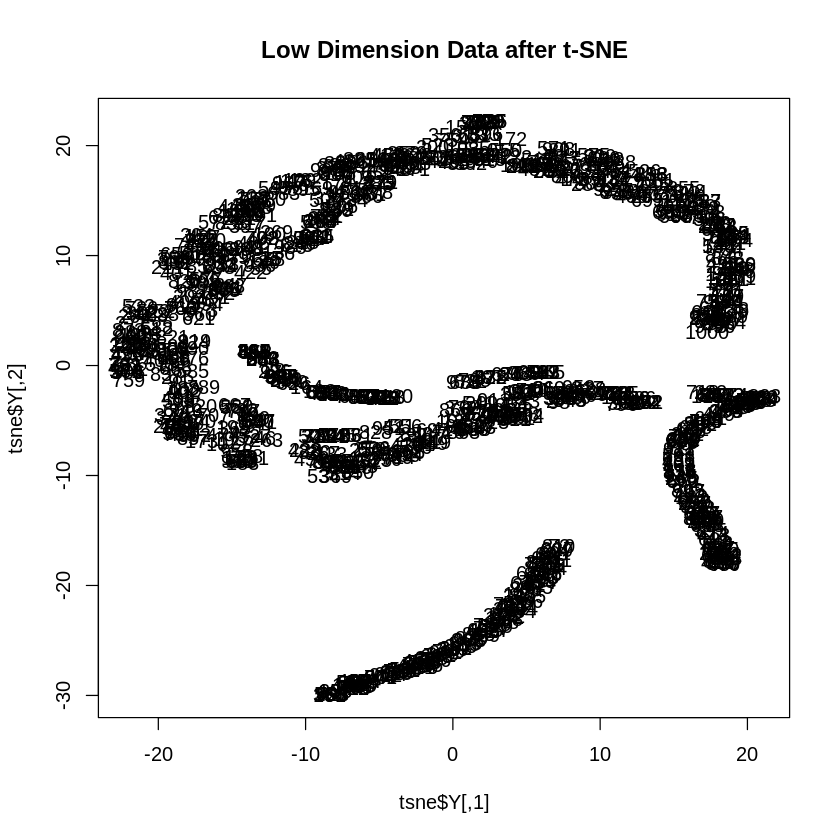

In [60]:
# Vizualize the dimensions
plot(tsne$Y, t='n', main='Low Dimension Data after t-SNE')
text(tsne$Y)

Attempted to reduce the features and tSNE is successful. The 21 features have been reduced to two.

However, clustering of the data is an issue as there is no outlined label. Attempted to use ranch of the supermarkets and here are the results.

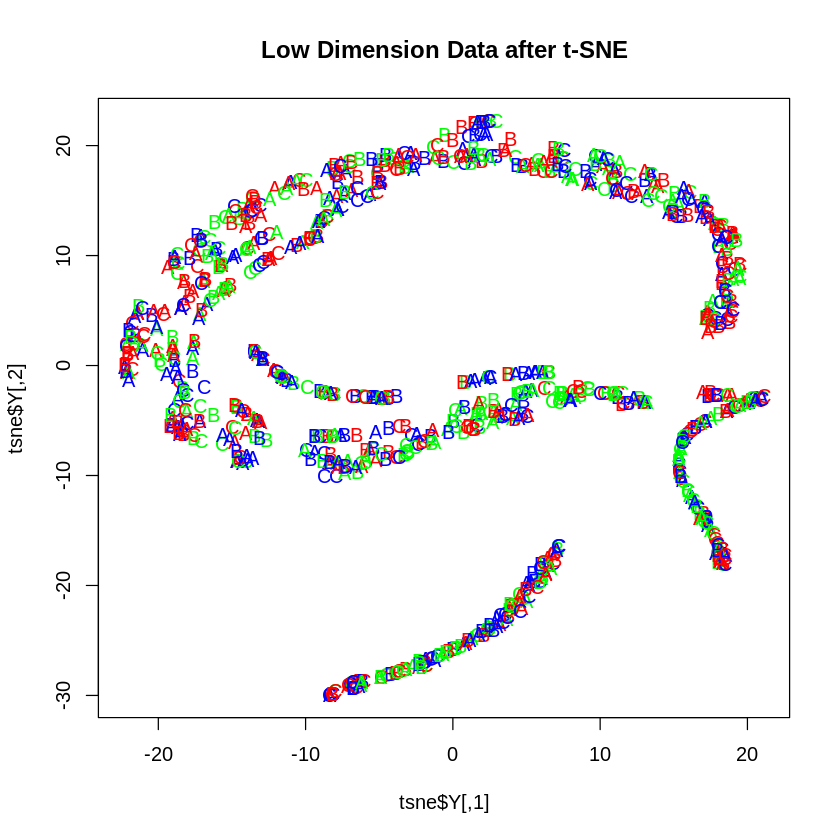

In [61]:
# Attempting to cluster the dimensions according to the Branch of the supermarket
plot(tsne$Y, t='n', main='Low Dimension Data after t-SNE')
text(tsne$Y, labels = label, col = colors)

# Feature Selection

When performing Machine Lerning or Data Analysis in General, some features have weight more than others, and feature selection techniques come in handy to aid us pick out those features for more accurate models and results.

In [69]:
# View our data

# Will use the encoded data created in the t-SNE section
df_fs <- df_encoded

head(df_fs)

,BranchA,BranchB,BranchC,Customer.typeMember,Customer.typeNormal,GenderFemale,GenderMale,Product.lineElectronic.accessories,Product.lineFashion.accessories,Product.lineFood.and.beverages,⋯,Unit.price,Quantity,Tax,PaymentCash,PaymentCredit.card,PaymentEwallet,cogs,gross.income,Rating,Total
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0,0,1,0,1,0,0,0,0,⋯,74.69,7,26.1415,0,0,1,522.83,26.1415,9.1,548.9715
2,0,0,1,0,1,1,0,1,0,0,⋯,15.28,5,3.8200,1,0,0,76.40,3.8200,9.6,80.2200
3,1,0,0,0,1,0,1,0,0,0,⋯,46.33,7,16.2155,0,1,0,324.31,16.2155,7.4,340.5255
4,1,0,0,1,0,0,1,0,0,0,⋯,58.22,8,23.2880,0,0,1,465.76,23.2880,8.4,489.0480
5,1,0,0,0,1,0,1,0,0,0,⋯,86.31,7,30.2085,0,0,1,604.17,30.2085,5.3,634.3785
6,0,0,1,0,1,0,1,1,0,0,⋯,85.39,7,29.8865,0,0,1,597.73,29.8865,4.1,627.6165


## Will use filter method and wrapper method then compare the results

## 1. Filter Method

In [45]:
# Load corrplot library
library(corrplot)

corrplot 0.92 loaded



In [62]:
## The data will be encoded via label encoding this time to avoid adding unneccessary features with hot encoding
# Branch

# Change the column to factor then as numeric
df_fs2 <- df_tsne2

df_fs2$Branch <- factor(df_fs2$Branch)
df_fs2$Branch <- as.numeric(df_fs2$Branch)

# Same for gender, customer type, product line and payment

# Customer type
df_fs2$Customer.type <- factor(df_fs2$Customer.type)
df_fs2$Customer.type <- as.numeric(df_fs2$Customer.type)

# Gender
df_fs2$Gender <- factor(df_fs2$Gender)
df_fs2$Gender <- as.numeric(df_fs2$Gender)

# Product line
df_fs2$Product.line <- factor(df_fs2$Product.line)
df_fs2$Product.line <- as.numeric(df_fs2$Product.line)

#Payment
df_fs2$Payment <- factor(df_fs2$Payment)
df_fs2$Payment <- as.numeric(df_fs2$Payment)

head(df_fs2)

,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Payment,cogs,gross.income,Rating,Total
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,1,4,74.69,7,26.1415,3,522.83,26.1415,9.1,548.9715
2,3,2,1,1,15.28,5,3.8200,1,76.40,3.8200,9.6,80.2200
3,1,2,2,5,46.33,7,16.2155,2,324.31,16.2155,7.4,340.5255
4,1,1,2,4,58.22,8,23.2880,3,465.76,23.2880,8.4,489.0480
5,1,2,2,6,86.31,7,30.2085,3,604.17,30.2085,5.3,634.3785
6,3,2,2,1,85.39,7,29.8865,3,597.73,29.8865,4.1,627.6165


In [82]:
# Find factors with a high correlation. Cutoff set to 0.7
corrmatrix <- cor(df_fs2)

highcorr <- findCorrelation(corrmatrix, cutoff = 0.7)
highcorr

names(df_fs2[, highcorr])


[1]  9 12  7 10

[1] "cogs"         "Total"        "Tax"          "gross.income"

The factors with high correlation include cogs, total and tax

In [83]:
# Dropping the highly correlated factors from the data

df_fs_clean <- df_fs2[-highcorr]

head(df_fs_clean)

,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Payment,Rating
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
1,1,1,1,4,74.69,7,3,9.1
2,3,2,1,1,15.28,5,1,9.6
3,1,2,2,5,46.33,7,2,7.4
4,1,1,2,4,58.22,8,3,8.4
5,1,2,2,6,86.31,7,3,5.3
6,3,2,2,1,85.39,7,3,4.1


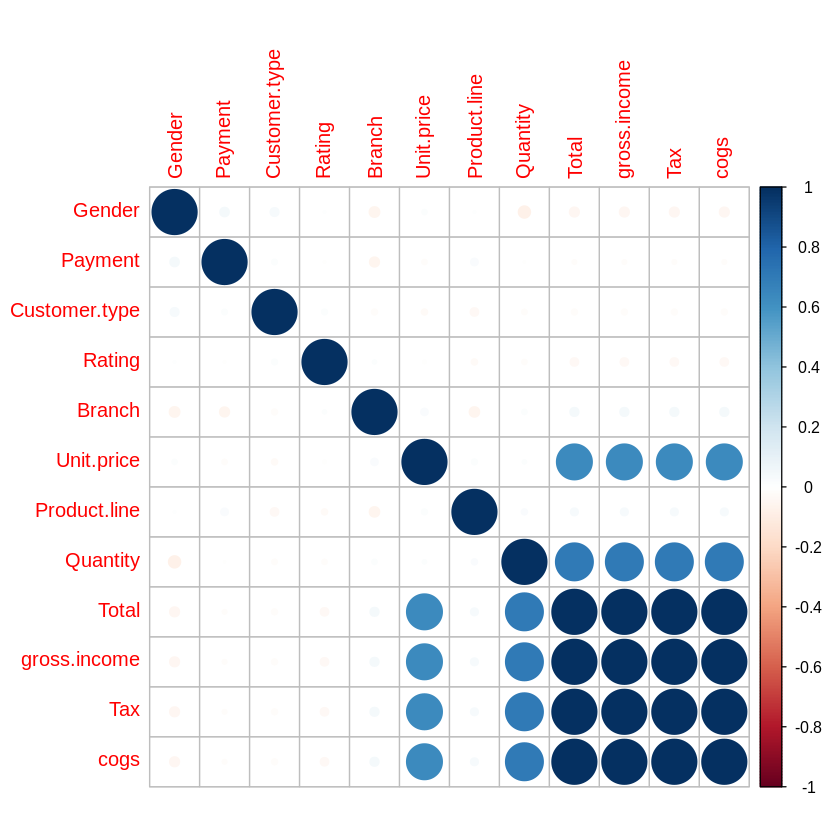

In [84]:
# Original correlation
corrplot(cor(df_fs2), order = 'hclust')

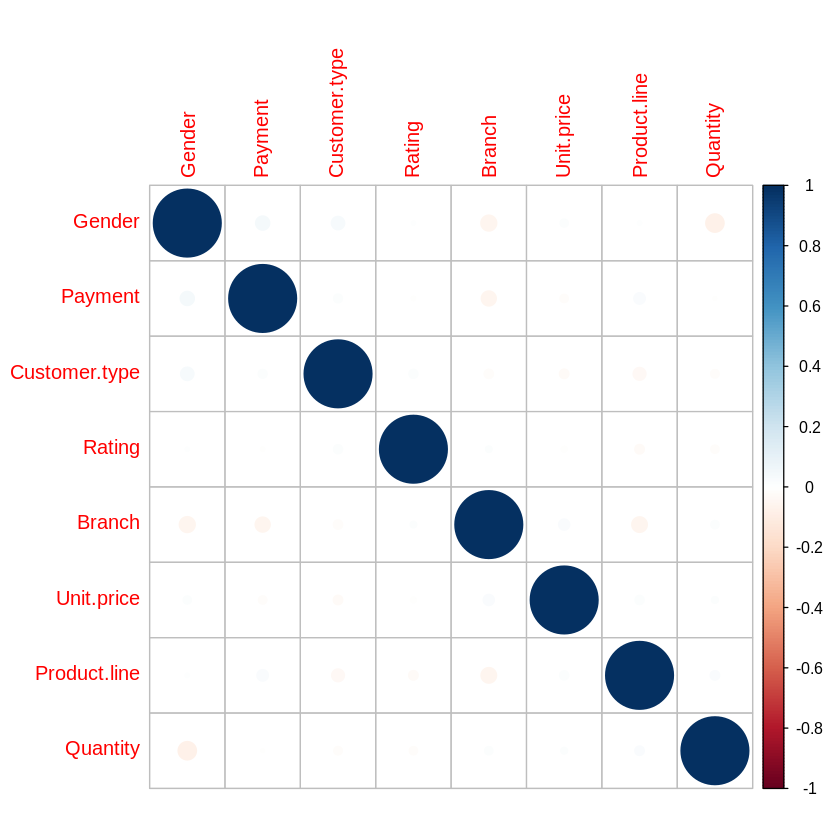

In [85]:
# Vizualize the new correlations

corrplot(cor(df_fs_clean), order = 'hclust')

The factors have been reduced to 8 from 12, which shows a great improvement in the correlation matrix.

## 2. Wrapper Method

In [90]:
# Will use the mclust module to have the function tell us what factors to drop. 
# It uses a Greedy Search type of search algorithm.

# Load the necessary libraries

library(clustvarsel)
library(mclust)

Loading required package: mclust

Package 'mclust' version 5.4.8
Type 'citation("mclust")' for citing this R package in publications.


Attaching package: ‘mclust’


The following object is masked from ‘package:purrr’:

    map


Package 'clustvarsel' version 2.3.4

Type 'citation("clustvarsel")' for citing this R package in publications.



In [91]:
# Lets build a greedy search algo

greedy <- clustvarsel(df_fs2, G = 1 : 5)
greedy

------------------------------------------------------ 
Variable selection for Gaussian model-based clustering
Stepwise (forward/backward) greedy search
------------------------------------------------------ 

 Variable proposed Type of step  BICclust Model G   BICdiff Decision
      Product.line          Add -3521.631     E 5 408.36743 Accepted
            Branch          Add -5233.923   VEV 5 735.71798 Accepted
     Customer.type          Add -6722.774   VEV 4 -23.45627 Rejected
            Branch       Remove -3498.098     E 5 712.18492 Rejected

Selected subset: Product.line, Branch

The algorithm has suggested that only two features , (Product Line and Branch) will be used in the model and the others to be rejected.

Lets build the cluster model

In [92]:
# Build the mclust model

subset <- df_fs2[, greedy$subset]

model <- Mclust(subset, G = 1 : 5)

# summary of the built model
summary(model)

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust VEI (diagonal, equal shape) model with 3 components: 

 log-likelihood    n df       BIC       ICL
      -2723.585 1000 12 -5530.063 -5531.496

Clustering table:
  1   2   3 
216 660 124 

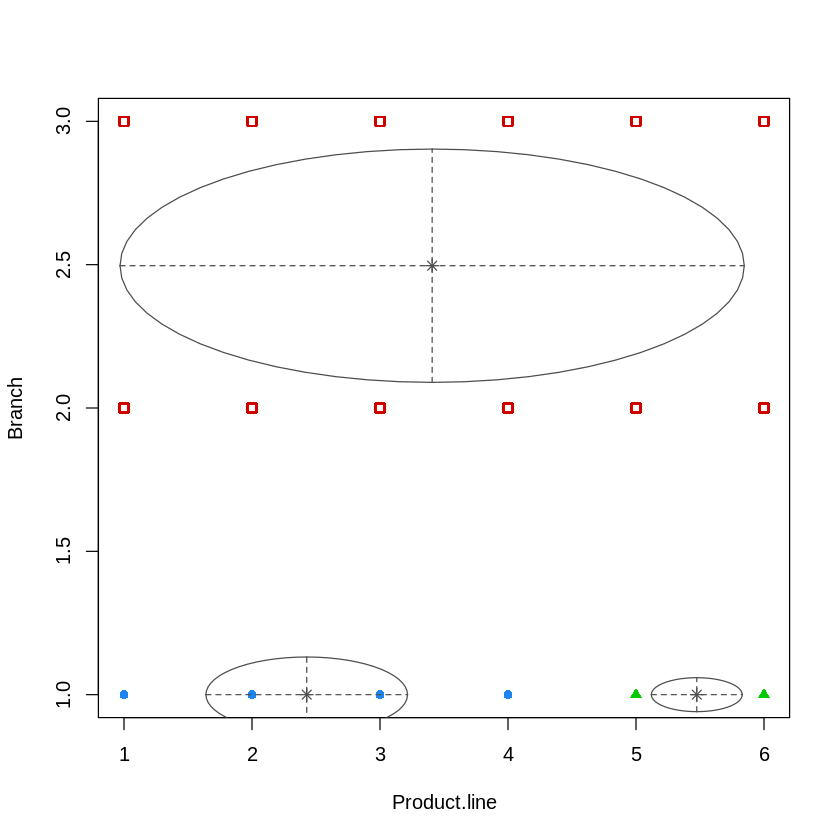

In [93]:
# The model plotted into clusters
plot(model, c('classification'))

The clusters have been built, using the two features selected by the greedy algorithm, therefore our reduction is a success!

# Association Analysis

- Here is where things get interesting. Carrefour provided a separate dataset that had all transactions done by the customers.

- The data will be used so as to find the most popular products and analyze the customers behaviour when picking certain products.

- Vamos!

In [95]:
# Load the data

# Will use arules library
library(arules)

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack



Attaching package: ‘arules’


The following object is masked from ‘package:dplyr’:

    recode


The following objects are masked from ‘package:base’:

    abbreviate, write




In [98]:
# Load the data

# Will use read.transactions

trs <- read.transactions('/content/customer purchases.csv', sep = ',')
trs

Warning message in asMethod(object):
“removing duplicated items in transactions”


transactions in sparse format with
 7501 transactions (rows) and
 119 items (columns)

We have 7500 transactions and 119 items

In [100]:
# Lets see 5 transactions
inspect(trs[1:5])

    items               
[1] {almonds,           
     antioxydant juice, 
     avocado,           
     cottage cheese,    
     energy drink,      
     frozen smoothie,   
     green grapes,      
     green tea,         
     honey,             
     low fat yogurt,    
     mineral water,     
     olive oil,         
     salad,             
     salmon,            
     shrimp,            
     spinach,           
     tomato juice,      
     vegetables mix,    
     whole weat flour,  
     yams}              
[2] {burgers,           
     eggs,              
     meatballs}         
[3] {chutney}           
[4] {avocado,           
     turkey}            
[5] {energy bar,        
     green tea,         
     milk,              
     mineral water,     
     whole wheat rice}  


In [102]:
# summary of the transactions
summary(trs)

transactions as itemMatrix in sparse format with
 7501 rows (elements/itemsets/transactions) and
 119 columns (items) and a density of 0.03288973 

most frequent items:
mineral water          eggs     spaghetti  french fries     chocolate 
         1788          1348          1306          1282          1229 
      (Other) 
        22405 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
1754 1358 1044  816  667  493  391  324  259  139  102   67   40   22   17    4 
  18   19   20 
   1    2    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   3.914   5.000  20.000 

includes extended item information - examples:
             labels
1           almonds
2 antioxydant juice
3         asparagus

We can see most popular item is mineral water, followed by eggs and spaghetti

In [105]:
# Viewing the items
items <- as.data.frame(itemLabels(trs))
colnames(items) <- "Items In the Supermarket"

#Preview 15
head(items, 15)

,Items In the Supermarket
,<chr>
1,almonds
2,antioxydant juice
3,asparagus
4,avocado
5,babies food
6,bacon
7,barbecue sauce
8,black tea
9,blueberries


### Most popular items (support)

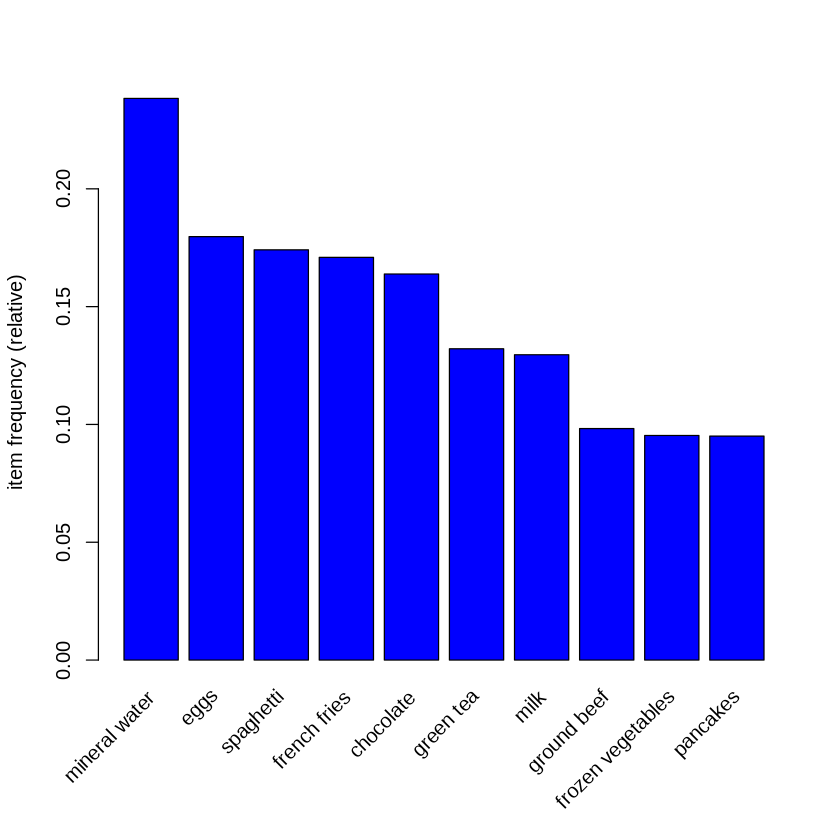

In [112]:
# Most 10 most popular items

itemFrequencyPlot(trs, col='blue', topN = 10)

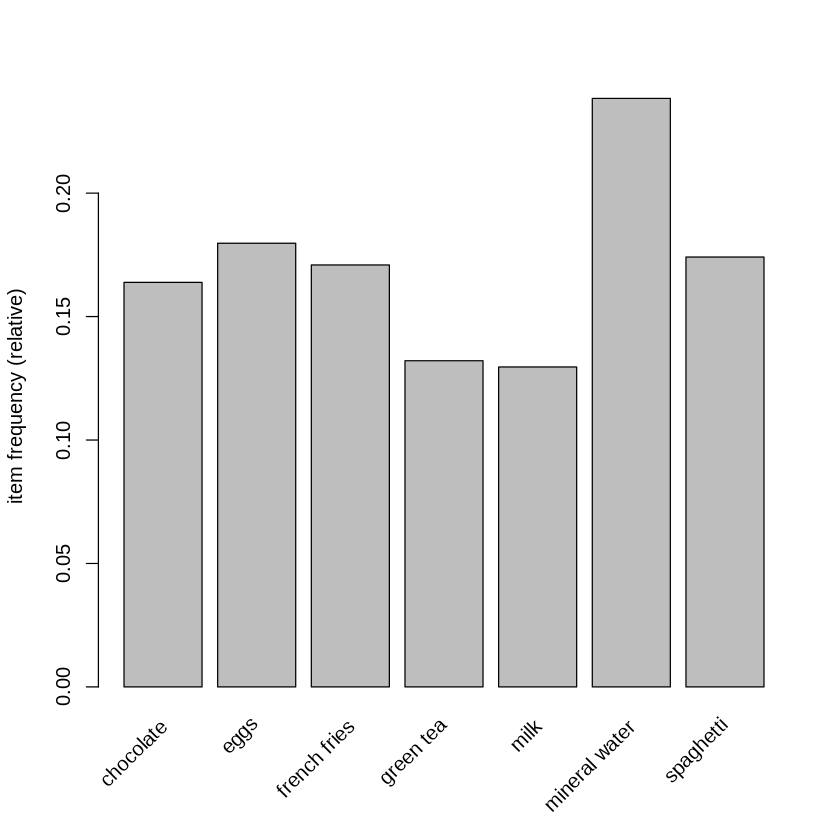

In [117]:
# Items with 10% importance
itemFrequencyPlot(trs, support =0.1)

These are the most important items for carrefour customers.

### developing apriori Rules for comparison purposes

In [118]:
rules <- apriori(trs, parameter = list(
  support = 0.001,
  confidence = 0.8
))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 7 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[119 item(s), 7501 transaction(s)] done [0.00s].
sorting and recoding items ... [116 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 done [0.01s].
writing ... [74 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


We have 74 rules

In [121]:
# For comparison, lets build another ruled module and compare
rules2 <- apriori(trs, parameter = list(
  support = 0.002,
  confidence = 0.7
))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.7    0.1    1 none FALSE            TRUE       5   0.002      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 15 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[119 item(s), 7501 transaction(s)] done [0.00s].
sorting and recoding items ... [115 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 done [0.00s].
writing ... [11 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Here there are 11 rules, therefore not efficient as the parameter's confidence is lowered and the support increased.

We will use the first one

In [122]:
# Lets view our rules summary
summary(rules)

set of 74 rules

rule length distribution (lhs + rhs):sizes
 3  4  5  6 
15 42 16  1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.000   4.000   4.000   4.041   4.000   6.000 

summary of quality measures:
    support           confidence        coverage             lift       
 Min.   :0.001067   Min.   :0.8000   Min.   :0.001067   Min.   : 3.356  
 1st Qu.:0.001067   1st Qu.:0.8000   1st Qu.:0.001333   1st Qu.: 3.432  
 Median :0.001133   Median :0.8333   Median :0.001333   Median : 3.795  
 Mean   :0.001256   Mean   :0.8504   Mean   :0.001479   Mean   : 4.823  
 3rd Qu.:0.001333   3rd Qu.:0.8889   3rd Qu.:0.001600   3rd Qu.: 4.877  
 Max.   :0.002533   Max.   :1.0000   Max.   :0.002666   Max.   :12.722  
     count       
 Min.   : 8.000  
 1st Qu.: 8.000  
 Median : 8.500  
 Mean   : 9.419  
 3rd Qu.:10.000  
 Max.   :19.000  

mining info:
 data ntransactions support confidence
  trs          7501   0.001        0.8
                                                        

In [123]:
# Lets view first 5 rules
inspect(rules[1:5])

    lhs                              rhs             support     confidence
[1] {frozen smoothie, spinach}    => {mineral water} 0.001066524 0.8888889 
[2] {bacon, pancakes}             => {spaghetti}     0.001733102 0.8125000 
[3] {nonfat milk, turkey}         => {mineral water} 0.001199840 0.8181818 
[4] {ground beef, nonfat milk}    => {mineral water} 0.001599787 0.8571429 
[5] {mushroom cream sauce, pasta} => {escalope}      0.002532996 0.9500000 
    coverage    lift      count
[1] 0.001199840  3.729058  8   
[2] 0.002133049  4.666587 13   
[3] 0.001466471  3.432428  9   
[4] 0.001866418  3.595877 12   
[5] 0.002666311 11.976387 19   


In the first rule, if someone buys smoothie and spinach, then there is an 89% chance of the customer buying mineral water

### Sorting the rules by confidence

In [125]:
rules <- sort(rules, by = 'confidence', decreasing = TRUE)
# Lets view rules lower than 100% confidence
inspect(rules[5:9])

    lhs                        rhs                 support confidence    coverage      lift count
[1] {mushroom cream sauce,                                                                       
     pasta}                 => {escalope}      0.002532996  0.9500000 0.002666311 11.976387    19
[2] {red wine,                                                                                   
     soup}                  => {mineral water} 0.001866418  0.9333333 0.001999733  3.915511    14
[3] {eggs,                                                                                       
     mineral water,                                                                              
     pasta}                 => {shrimp}        0.001333156  0.9090909 0.001466471 12.722185    10
[4] {herb & pepper,                                                                              
     mineral water,                                                                              
     rice}          

There is a 95% chance of a customer buying escalope after buying pasta

### Lets imagine Carrefour wants to boost their sales on milk as they have a deal with Brookside.

In [133]:
# Well see the most common items bought before a customer picks milk

milk <- subset(rules, subset = rhs %pin% 'milk')
# sort by confidence
milk <- sort(milk, by = 'confidence', decreasing = TRUE)

# Inspect first 5 commodities

inspect(milk[1 : 5])

    lhs                                    rhs    support     confidence
[1] {cake, meatballs, mineral water}    => {milk} 0.001066524 1.0000000 
[2] {escalope, hot dogs, mineral water} => {milk} 0.001066524 0.8888889 
[3] {meatballs, whole wheat pasta}      => {milk} 0.001333156 0.8333333 
[4] {black tea, frozen smoothie}        => {milk} 0.001199840 0.8181818 
[5] {burgers, ground beef, olive oil}   => {milk} 0.001066524 0.8000000 
    coverage    lift     count
[1] 0.001066524 7.717078  8   
[2] 0.001199840 6.859625  8   
[3] 0.001599787 6.430898 10   
[4] 0.001466471 6.313973  9   
[5] 0.001333156 6.173663  8   


We can see, customers buying cake, meatballs and water have the highest chances of picking milk, with a confidence of 100 %

Milk should be placed around the said items. 

Other items to be considered includes black tea , hot dogs and ground beef

In [131]:
# Well see the most common items bought after a customer picks milk

milk2 <- subset(rules, subset = lhs %pin% 'milk')
# sort by confidence
milk2 <- sort(milk2, by = 'confidence', decreasing = TRUE)

# Inspect first 10 commodities

inspect(milk2[1 : 10])

     lhs                     rhs                     support confidence    coverage      lift count
[1]  {frozen vegetables,                                                                           
      milk,                                                                                        
      spaghetti,                                                                                   
      turkey}             => {mineral water}     0.001199840  0.9000000 0.001333156  3.775671     9
[2]  {cake,                                                                                        
      meatballs,                                                                                   
      milk}               => {mineral water}     0.001066524  0.8888889 0.001199840  3.729058     8
[3]  {burgers,                                                                                     
      milk,                                                                                        


Mineral water, spaghetti and shrimp should be placed around milk, to boost the sales of both commodities

This can be done on a variety of commodities so as to boost the sales of the items and bring substancial profits to carrefour Kenya.

Very interesting.

# Anomaly Detection

As a Data Scientist, I will proceed to use some techniques so as to identify any inconsistencies within the company's day to day data, also known as anomalies

In [136]:
# Load anomalize library and tibbletime

library(anomalize)
library(tibbletime)

══ Use anomalize to improve your Forecasts by 50%! ═════════════════════════════
Business Science offers a 1-hour course - Lab #18: Time Series Anomaly Detection!
</> Learn more at: https://university.business-science.io/p/learning-labs-pro </>



In [175]:
#Load data'
sales3 <- read.csv('/content/sales time series.csv') %>%

#Change date column to date time

mutate(Date = as.Date(Date, format = '%m/%d/%Y')) %>%
# Change to tibble
as_tbl_time(Date) %>%

#sort days per 'daily'
as_period('daily')

Note: Index not ordered. tibbletime assumes index is in ascending order. Results may not be as desired.



In [177]:
# output first 6 recorde
head(sales3)

Date,Sales
<date>,<dbl>
2019-01-05,548.9715
2019-02-06,417.5640
2019-02-27,535.7205
2019-02-28,722.2320
2019-02-14,318.1080
2019-01-23,161.7000


In [178]:
# Run dataset on anomalizer 
sales3_out <- sales3 %>%
time_decompose(Sales, merge = TRUE) %>%
anomalize(remainder) %>%
time_recompose()


Note: Index not ordered. tibbletime assumes index is in ascending order. Results may not be as desired.

frequency = 4 days

Note: Index not ordered. tibbletime assumes index is in ascending order. Results may not be as desired.

Note: Index not ordered. tibbletime assumes index is in ascending order. Results may not be as desired.

trend = 47 days

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



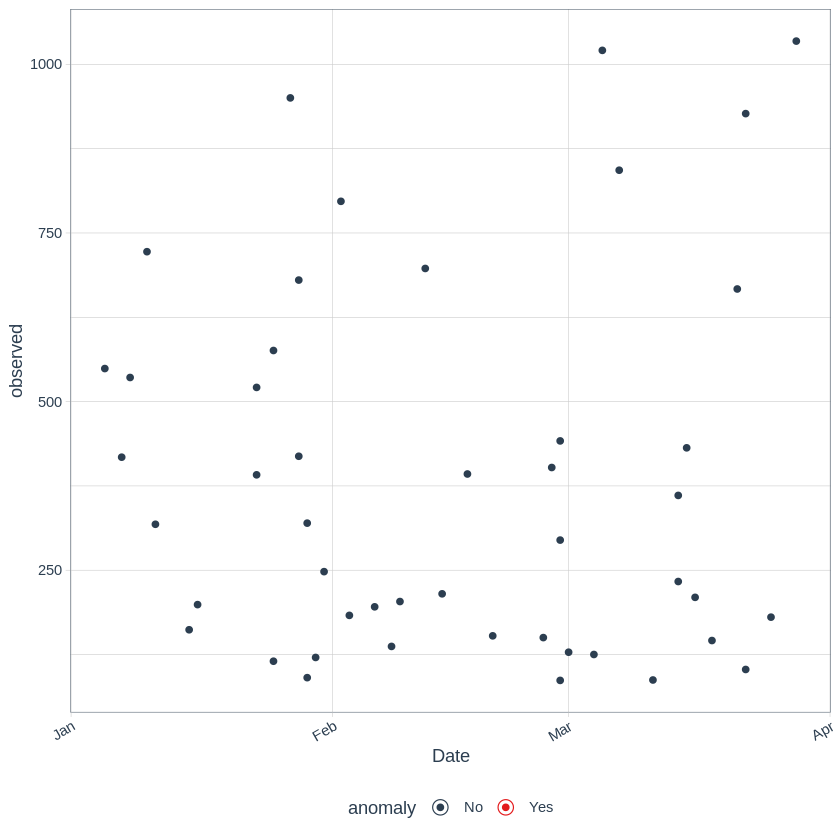

In [179]:
# Plotting the outliers
sales3_out %>%
plot_anomalies()

Woohoo! No anomalies detected in the company's data. Safe to say no fraud is going on